In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 배급한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [2]:
df = pd.read_csv('/content/vgames2.csv')
df.drop('Unnamed: 0', axis =1, inplace= True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# 기본 데이터 조회

## info/결측치 확인 및 제거/중복값 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
# 결측치 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
# 결측치 제거

df= df.dropna().reset_index(drop=True)
df.shape

(16241, 9)

In [6]:
# 중복값 확인

df.duplicated().value_counts()

False    16241
dtype: int64

In [7]:
df.describe()

,Year
count,16241.000000
mean,1994.178437
std,155.484265
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [8]:
# 장르별 데이터 수량

df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [9]:
# 플랫폼별 데이터 수량

df['Platform'].value_counts().head()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
Name: Platform, dtype: int64

In [10]:
# 국가별 sales 컬럼의 데이터 단위 통일

def str_to_float(df):
  sales_str = df
  if 'K' in sales_str :
    sales_str.replace('K', '')
    sales_str = float(sales_str.replace('K', ''))
    return sales_str/1000
  elif 'M' in sales_str : 
    sales_str.replace('M', '')
    sales_str = float(sales_str.replace('M', ''))
    return sales_str
  else :
    return float(sales_str)

In [11]:
# 위의 사용자 지정 함수 적용

df['NA_Sales'] = df.NA_Sales.apply(str_to_float)
df['EU_Sales'] = df.EU_Sales.apply(str_to_float)
df['JP_Sales'] = df.JP_Sales.apply(str_to_float)
df['Other_Sales'] = df.Other_Sales.apply(str_to_float)

In [13]:
# 국가별 총 출고량을 합한 'all_sales' 컬럼 생성

df['all_sales'] = df['EU_Sales'] + df['NA_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['all_sales'] = df['all_sales']
df['all_sales'] = df['all_sales'].astype(int)

In [14]:
df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [15]:
df[df['Year'] >= 2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Western_Sales,all_sales
5196,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.00,0
6765,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.27,0
9911,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.00,0
14903,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.00,0


In [16]:
# Year 컬럼의 소수점 제거하고, int type 으로 변경

df['Year'] = df['Year'].astype(int)

# Year 컬럼의 이상치 및 극소수의 데이터(2020년 1개) 제거
drop_year = df[(df['Year'] < 1900) | (df['Year'] > 2019)].index
df = df.drop(drop_year)
df.shape


(16140, 11)

In [17]:
# 출시연도 그룹화 (80년대,  90년대, 00년대, 10년대(10년대는 2020 데이터 1개 포함함))

df.loc[df['Year'] < 1990, 'Year_group'] = 1980
df.loc[(df['Year'] >= 1990) & (df['Year'] < 2000), 'Year_group'] = 1990
df.loc[(df['Year'] >= 2000) & (df['Year'] < 2010), 'Year_group'] = 2000
df.loc[df['Year'] >= 2010, 'Year_group'] = 2010



df['Year_group'] = df['Year_group'].astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Western_Sales,all_sales,Year_group
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0,2000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.17,0,2000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0,2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.21,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.19,0,2000
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0,2000
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.63,0,2010
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.10,0,2010


In [18]:
df_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales' ]].sum().to_frame()
df_sales.columns = ['total_sales']
df_sales

,total_sales
NA_Sales,4279.61
EU_Sales,2377.87
JP_Sales,1258.21
Other_Sales,778.37


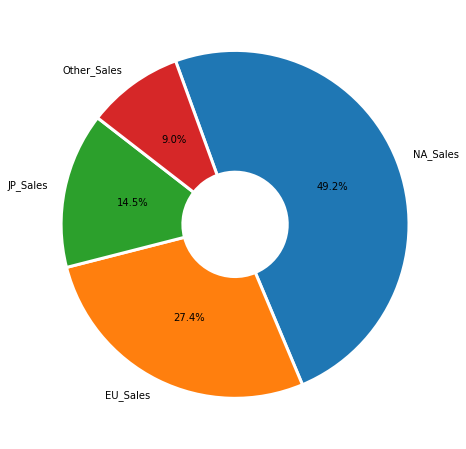

In [19]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(df_sales['total_sales'],labels = df_sales.index, autopct = '%.1f%%',startangle=110,counterclock=False, wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':3})
plt.rc('font', size=15) 
plt.rc('axes', labelsize=20) 

In [20]:
df['Genre'].value_counts()

Action          3226
Sports          2289
Misc            1671
Role-Playing    1457
Shooter         1268
Adventure       1264
Racing          1209
Platform         865
Simulation       840
Fighting         829
Strategy         664
Puzzle           558
Name: Genre, dtype: int64

# 연도별 장르에 따른 글로벌 총 출고량 분석

df3= df.groupby(['Year','Genre'])['all_sales'].count().to_frame()

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
sns.lineplot(data=df3 , x= 'Year', y= 'all_sales', hue='Genre')
plt.show()

In [ ]:
df3= df.groupby(['Year','Genre'])['all_sales'].count().to_frame()

fig = plt.figure(figsize=(10, 6)) fig.set_facecolor('white') sns.lineplot(data=df3 , x= 'Year', y= 'all_sales', hue='Genre') plt.show()

In [21]:
# 전체 플랫폼 중 플레이스테이션의 비율

def totla_PS(df4):
  PS_toal = df4
  if 'PS' in df4 :
    return '플레이스테이션O'
  else :
    return '플레이스테이션X'

df['PS_total'] = df.Platform.apply(totla_PS)
df_PS = round(df['PS_total'].value_counts(normalize=True)*100, 2)
df_PS.to_frame()

,PS_total
플레이스테이션X,59.73
플레이스테이션O,40.27


In [22]:
df_platform = df['Platform'].value_counts().to_frame()

df_platform.reset_index()


,index,Platform
0,DS,2110
1,PS2,2109
2,PS3,1291
3,Wii,1279
4,X360,1226
5,PSP,1186
6,PS,1178
7,PC,929
8,XB,794
9,GBA,780


In [23]:
# 플랫폼 총 출고량이 300개 이상인 플랫폼명 추출

drop_platform = df_platform[df_platform['Platform'] < 300].index
df2 = df_platform.drop(drop_platform)
df2.index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64'],
      dtype='object')

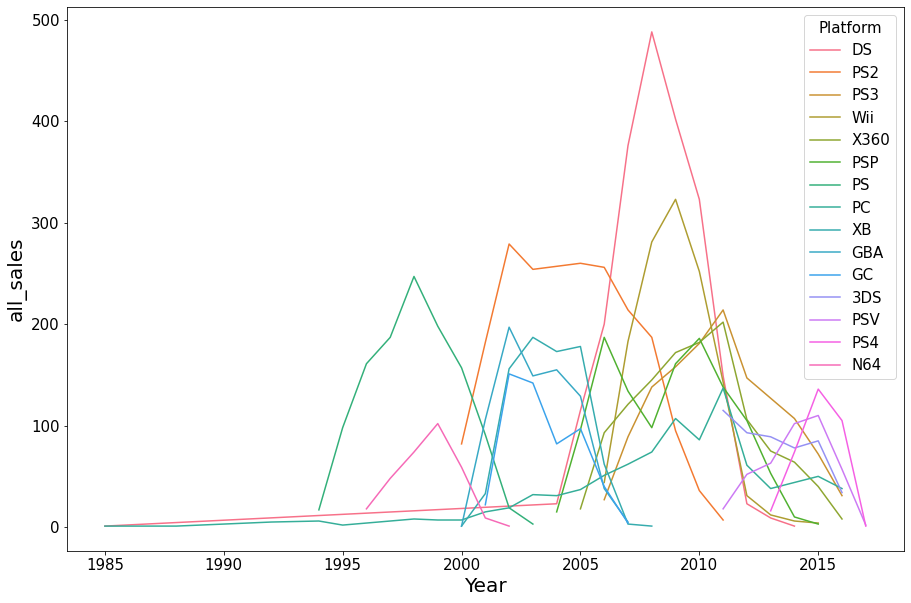

In [24]:
# 출시연도 별 플랫폼에 따른 출고량(300개 이상의 데이터만 출력)

df4= df.groupby(['Year','Platform'])['all_sales'].count().to_frame()

hue_order = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC','3DS', 'PSV', 'PS4', 'N64']

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
sns.lineplot(data=df4, x='Year',y ='all_sales', hue='Platform', hue_order = hue_order) ## '월'을 나타내는 경우 특정 월만 표시해야 할때에는 반드시 hue_order를 지정해야한다.


In [180]:
# 장르별 국가에 따른 출고량 확인

sales_genre= df.groupby('Genre')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'].sum()
sales_genre= round(sales_genre, 2)
sales_genre.reset_index(inplace=True)
sales_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,855.96,512.52,155.73,183.64
1,Adventure,101.33,63.32,51.79,16.64
2,Fighting,220.11,99.72,86.39,36.10
3,Misc,394.29,207.68,103.71,72.54
4,Platform,442.46,199.40,129.22,51.15
5,Puzzle,121.00,50.39,56.19,12.39
6,Racing,353.57,234.20,55.42,76.23
7,Role-Playing,307.08,176.31,336.25,54.71
8,Shooter,570.89,307.26,37.34,100.82
9,Simulation,180.77,112.68,63.46,31.22


Text(0, 0.5, 'Genre')

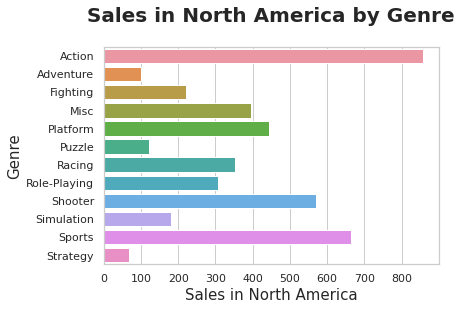

In [26]:
# 장르별 북미지역의 출고량 시각화

sns.set_theme(style="whitegrid") 
sns.barplot(x="NA_Sales", y="Genre", data=sales_genre).set_title("Sales in North America by Genre", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in North America", fontsize = 15)
plt.ylabel("Genre", fontsize = 15)


In [108]:
# 장르별 북미지역의 출고량 평균 상위 5개 시각화

NA_genre = sales_genre.groupby('Genre')['NA_Sales'].sum()
NA_genre = NA_genre.nlargest(5).to_frame()
NA_genre




,NA_Sales
Genre,
Action,855.96
Sports,664.33
Shooter,570.89
Platform,442.46
Misc,394.29


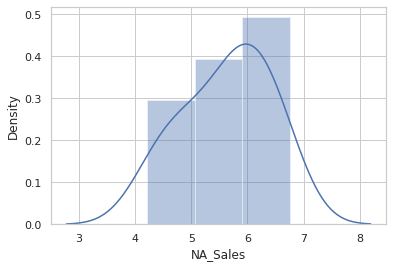

In [28]:
NA_genre_log = np.log(sales_genre['NA_Sales'])

sns.distplot(NA_genre_log);

Text(0, 0.5, 'Genre')

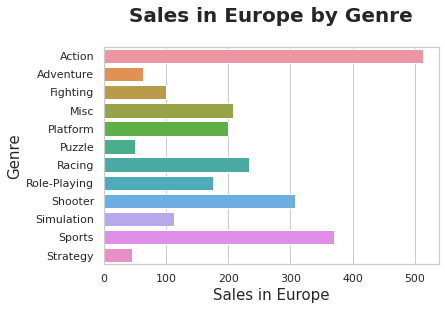

In [29]:
# 장르별 유럽지역의 출고량 평균 시각화

sns.set_theme(style="whitegrid") 
sns.barplot(x="EU_Sales", y="Genre", data=sales_genre).set_title("Sales in Europe by Genre", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Europe", fontsize = 15)
plt.ylabel("Genre", fontsize = 15)


In [113]:
# 장르별 유럽지역의 출고량 평균 상위 5개

EU_genre = sales_genre.groupby('Genre')['EU_Sales'].mean()
EU_genre = EU_genre.nlargest(5).to_frame()
EU_genre


,EU_Sales
Genre,
Action,512.52
Sports,369.69
Shooter,307.26
Racing,234.20
Misc,207.68


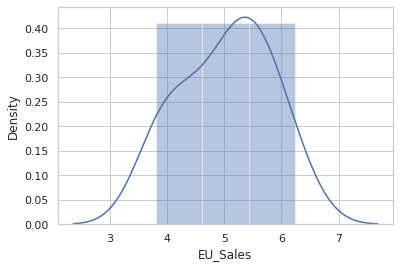

In [31]:
EU_genre_log = np.log(sales_genre['EU_Sales'])

sns.distplot(EU_genre_log);

,JP_Sales
Genre,
Role-Playing,336.25
Action,155.73
Sports,134.58
Platform,129.22
Misc,103.71


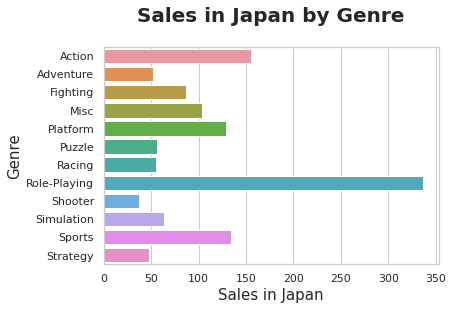

In [32]:
# 장르별 일본지역의 출고량 시각화

sns.set_theme(style="whitegrid") 
sns.barplot(x="JP_Sales", y="Genre", data=sales_genre).set_title("Sales in Japan by Genre", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Japan", fontsize = 15)
plt.ylabel("Genre", fontsize = 15)

JP_genre = sales_genre.groupby('Genre')['JP_Sales'].mean()
JP_genre = JP_genre.nlargest(5).to_frame()
JP_genre

Text(0, 0.5, 'Sales')

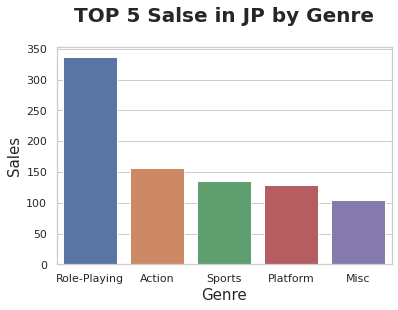

In [33]:
# 장르별 일본지역의 출고량 평균 상위 5개

JP_genre = sales_genre.groupby('Genre')['JP_Sales'].mean()
JP_genre = JP_genre.nlargest(5).to_frame()
JP_genre = JP_genre.reset_index()


sns.set_theme(style="whitegrid") 
sns.barplot(x="Genre", y="JP_Sales", data=JP_genre).set_title("TOP 5 Salse in JP by Genre", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)

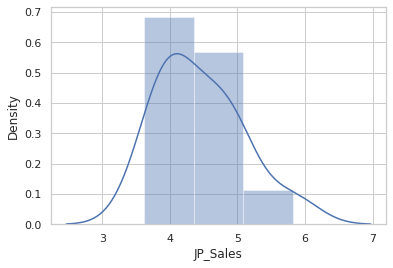

In [34]:
jp_genre_log = np.log(sales_genre['JP_Sales'])

sns.distplot(jp_genre_log);

Text(0, 0.5, 'Genre')

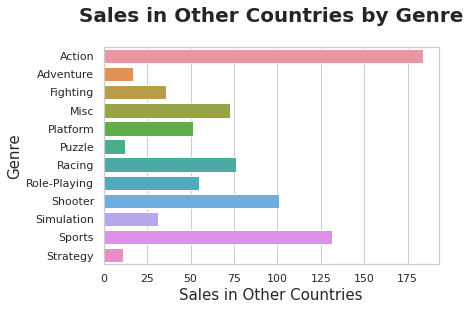

In [35]:
# 장르별 기타지역의 출고량 시각화

sns.set_theme(style="whitegrid") 
sns.barplot(x="Other_Sales", y="Genre", data=sales_genre).set_title("Sales in Other Countries by Genre", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Other Countries", fontsize = 15)
plt.ylabel("Genre", fontsize = 15)

In [115]:
# 장르별 기타지역의 출고량 평균 상위 5개

Other_genre = sales_genre.groupby('Genre')['Other_Sales'].mean()
Other_genre = Other_genre.nlargest(5).to_frame()
Other_genre




,Other_Sales
Genre,
Action,183.64
Sports,131.73
Shooter,100.82
Racing,76.23
Misc,72.54


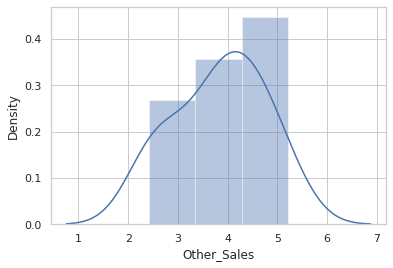

In [37]:
Other_genre_log = np.log(sales_genre['Other_Sales'])

sns.distplot(Other_genre_log);

In [38]:
# 4개로 나누어진 지역별 출고량을 합하여 'all_sales' 컬럼 생성
# 장르별 글로벌 출고량의 합계 상위 5개 추출

df_genre = sales_genre.append(['NA_genre','EU_genre','JP_genre','Other_genre'],sort=False,ignore_index=True)

df_genre = df_genre.drop(labels=range(12,16), axis=0)
df_genre = df_genre.drop(labels=range(1), axis=1)


df_genre['all_sales'] = df_genre['EU_Sales'] + df_genre['NA_Sales'] + df_genre['JP_Sales'] + df_genre['Other_Sales']
df_genre = df_genre[['Genre','all_sales']]
df_genre =df_genre.sort_values(by=['all_sales'],ascending=False)
df_genre = df_genre.nlargest(5,'all_sales', keep='first')
df_genre

,Genre,all_sales
0,Action,1707.85
10,Sports,1300.33
8,Shooter,1016.31
7,Role-Playing,874.35
4,Platform,822.23


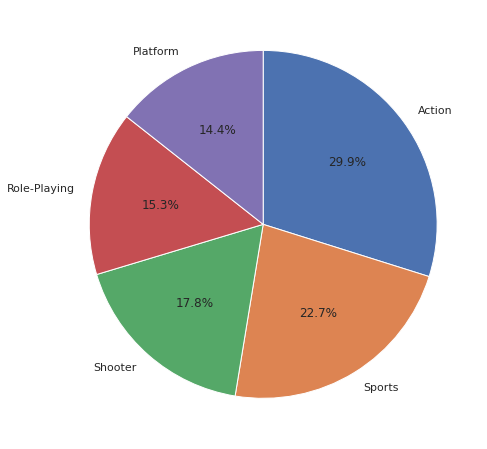

In [39]:
# 장르별 글로벌 출고량의 합계 상위 5개 시각화

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
plt.pie(df_genre['all_sales'], labels = df_genre['Genre'], startangle=90, autopct='%1.1f%%', counterclock=False)
plt.show()

In [40]:
# 배급사 중 2위인 Activision 사의 데이터 확인을 위한 그룹화

publisher_grp = df.groupby(['Publisher'])
publisher_grp_Activision = publisher_grp.get_group('Activision')

Activision_Genre = publisher_grp_Activision.groupby(['Genre'])
publisher_grp_Activision = publisher_grp.get_group('Activision')


In [41]:
# 배급사 중 2위인 Activision 사의 장르별 북미지역 출고량 평균

publisher_grp_Activision.groupby('Genre')['NA_Sales'].mean()

Genre
Action          0.281694
Adventure       0.161600
Fighting        0.277143
Misc            0.472621
Platform        0.390833
Puzzle          0.111429
Racing          0.165211
Role-Playing    0.575122
Shooter         1.039477
Simulation      0.231739
Sports          0.366879
Strategy        0.370909
Name: NA_Sales, dtype: float64

In [42]:
# 플랫폼 별 지역에 따른 출고량 평균

sales_platform= df.groupby('Platform')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'].mean()
sales_platform= round(sales_platform, 2)
sales_platform.reset_index(inplace=True)
sales_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,0.70,0.04,0.00,0.01
1,3DO,0.00,0.00,0.03,0.00
2,3DS,0.15,0.11,0.19,0.02
3,DC,0.10,0.03,0.16,0.01
4,DS,0.18,0.09,0.08,0.03
5,GB,1.18,0.49,0.88,0.08
6,GBA,0.23,0.09,0.06,0.01
7,GC,0.24,0.07,0.04,0.01
8,GEN,0.71,0.20,0.10,0.03
9,GG,0.00,0.00,0.04,0.00


Text(0, 0.5, 'Platform')

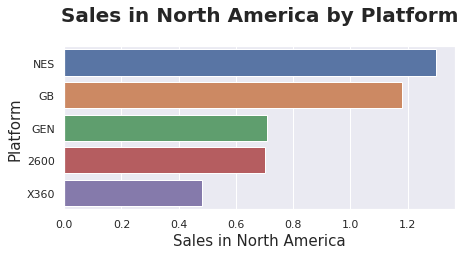

In [43]:
# 플랫폼 별 북미지역 출고량 평균의 상위 5개 시각화

NA_platform= sales_platform.groupby('Platform')['NA_Sales'].mean()
NA_platform = NA_platform.nlargest(5).to_frame()
NA_platform.reset_index(inplace=True)

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x="NA_Sales", y="Platform", data=NA_platform).set_title("Sales in North America by Platform", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in North America", fontsize = 15)
plt.ylabel("Platform", fontsize = 15)

Text(0, 0.5, 'Platform')

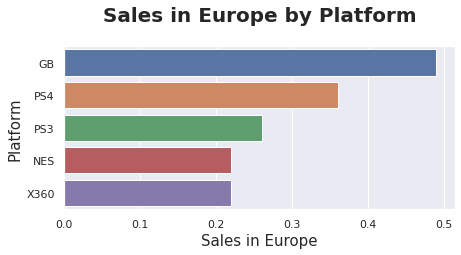

In [44]:
# 플랫폼 별 유럽지역 출고량 평균의 상위 5개 시각화

EU_platform= sales_platform.groupby('Platform')['EU_Sales'].mean()
EU_platform = EU_platform.nlargest(5).to_frame()
EU_platform.reset_index(inplace=True)

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x="EU_Sales", y="Platform", data=EU_platform).set_title("Sales in Europe by Platform", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Europe", fontsize = 15)
plt.ylabel("Platform", fontsize = 15)

Text(0, 0.5, 'Platform')

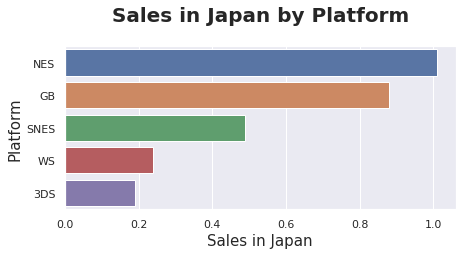

In [45]:
# 플랫폼 별 일본지역 출고량 평균의 상위 5개 시각화

JP_platform= sales_platform.groupby('Platform')['JP_Sales'].mean()
JP_platform = JP_platform.nlargest(5).to_frame()
JP_platform.reset_index(inplace=True)

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x="JP_Sales", y="Platform", data=JP_platform).set_title("Sales in Japan by Platform", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Japan", fontsize = 15)
plt.ylabel("Platform", fontsize = 15)

Text(0, 0.5, 'Platform')

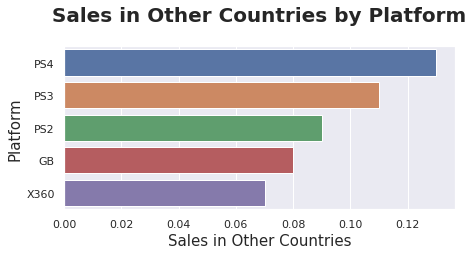

In [46]:
# 플랫폼 별 기타지역 출고량 평균의 상위 5개 시각화

Other_platform= sales_platform.groupby('Platform')['Other_Sales'].mean()
Other_platform = Other_platform.nlargest(5).to_frame()
Other_platform.reset_index(inplace=True)

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x="Other_Sales", y="Platform", data=Other_platform).set_title("Sales in Other Countries by Platform", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Sales in Other Countries", fontsize = 15)
plt.ylabel("Platform", fontsize = 15)

In [85]:
# 1980년대에 출시 된 게임의 장르 상위 3개 

genre_80 = df.groupby(['Year_group'])
genre_80 = genre_80.get_group(1980)

genre_80= genre_80.groupby('Genre')['Year_group'].count()
genre_80 = genre_80.nlargest(3).to_frame()
genre_80.reset_index(inplace=True)
genre_80


,Genre,Year_group
0,Action,66
1,Platform,32
2,Shooter,30


Text(0, 0.5, 'Count')

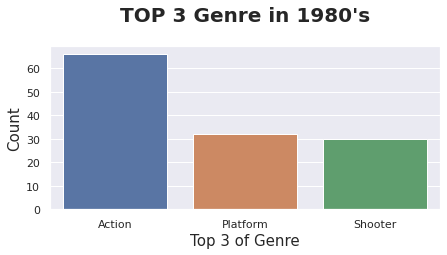

In [94]:
# 1980년대에 출시 된 게임의 장르 상위 3개 시각화

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Genre', y='Year_group', data=genre_80).set_title("TOP 3 Genre in 1980's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Genre", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

In [87]:
# 1990년대에 출시 된 게임의 장르 상위 3개

genre_90 = df.groupby(['Year_group'])
genre_90 = genre_90.get_group(1990)
genre_90 = genre_90.groupby('Genre')['Year_group'].count()
genre_90 = genre_90.nlargest(3).to_frame()
genre_90.reset_index(inplace=True)
genre_90

,Genre,Year_group
0,Sports,303
1,Fighting,191
2,Racing,179


Text(0, 0.5, 'Count')

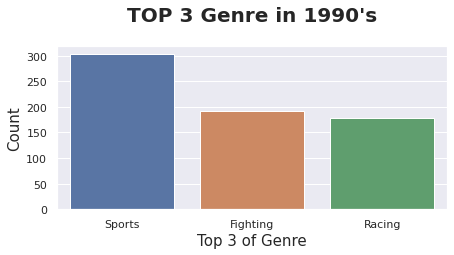

In [93]:
# 1990년대에 출시 된 게임의 장르 상위 3개 시각화

sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Genre', y='Year_group', data=genre_90).set_title("TOP 3 Genre in 1990's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Genre", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0, 0.5, 'Count')

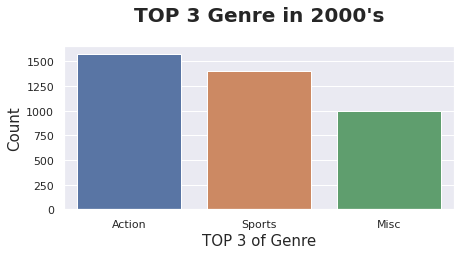

In [95]:
# 2000년대에 출시 된 게임의 장르 상위 3개 시각화

genre_00 = df.groupby(['Year_group'])
genre_00 = genre_00.get_group(2000)

genre_00= genre_00.groupby('Genre')['Year_group'].count()
genre_00 = genre_00.nlargest(3).to_frame()
genre_00.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Genre', y='Year_group', data=genre_00).set_title("TOP 3 Genre in 2000's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("TOP 3 of Genre", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0, 0.5, 'Count')

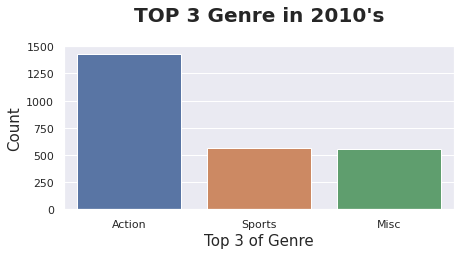

In [96]:
# 2100년대에 출시 된 게임의 장르 상위 3개 시각화

genre_10 = df.groupby(['Year_group'])
genre_10 = genre_10.get_group(2010)

genre_10= genre_10.groupby('Genre')['Year_group'].count()
genre_10 = genre_10.nlargest(3).to_frame()
genre_10.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Genre', y='Year_group', data=genre_10).set_title("TOP 3 Genre in 2010's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Genre", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

In [90]:
# 2010년대에 출시 된 게임의 장르 상위 3개 시각화

genre_10 = df.groupby(['Year_group'])
genre_10 = genre_10.get_group(2010)

genre_10= genre_10.groupby('Genre')['Year_group'].count()
genre_10 = genre_10.nlargest(3).to_frame()
genre_10 = genre_10.reset_index(inplace=True)
genre_10


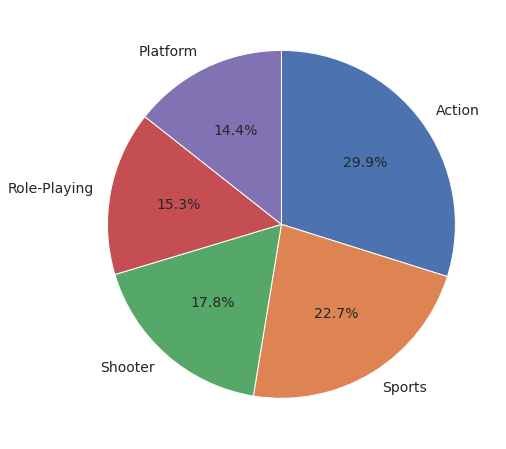

In [82]:
# 4개로 나누어진 지역별 출고량을 합하여 'all_sales' 컬럼 생성
# 2010년 이후 장르별 글로벌 출고량의 합계 상위 5개 추출 후 시각화 

genre_10 = sales_genre.append(['NA_genre','EU_genre','JP_genre','Other_genre'],sort=False,ignore_index=True)

genre_10 = genre_10.drop(labels=range(12,16), axis=0)
genre_10 = genre_10.drop(labels=range(1), axis=1)


genre_10['all_sales'] = genre_10['EU_Sales'] + genre_10['NA_Sales'] + genre_10['JP_Sales'] + genre_10['Other_Sales']
genre_10 = genre_10[['Genre','all_sales']]
genre_10 =genre_10.sort_values(by=['all_sales'],ascending=False)
genre_10 = genre_10.nlargest(5,'all_sales', keep='first')


fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
plt.pie(genre_10['all_sales'], labels = genre_10['Genre'], startangle=90, autopct='%1.1f%%', counterclock=False, textprops={'fontsize': 14})
  # text font size
plt.show()


Text(0, 0.5, 'Count')

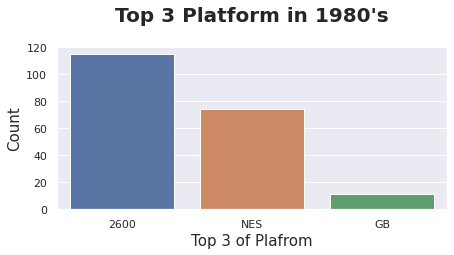

In [98]:
# 1980년대에 출시 된 게임의 플랫폼 상위 3개 시각화

platform_80 = df.groupby(['Year_group'])
platform_80 = platform_80.get_group(1980)

platform_80= platform_80.groupby('Platform')['Year_group'].count()
platform_80 = platform_80.nlargest(3).to_frame()
platform_80.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Platform', y='Year_group', data= platform_80).set_title("Top 3 Platform in 1980's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Plafrom", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0, 0.5, 'Count')

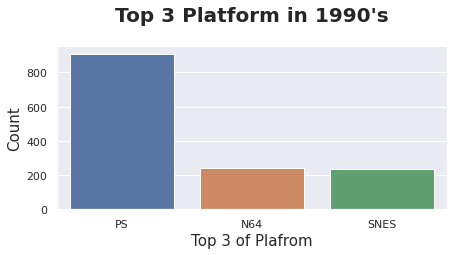

In [99]:
# 1990년대에 출시 된 게임의 플랫폼 상위 5개 시각화

platform_90 = df.groupby(['Year_group'])
platform_90 = platform_90.get_group(1990)

platform_90= platform_90.groupby('Platform')['Year_group'].count()
platform_90 = platform_90.nlargest(3).to_frame()
platform_90.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Platform', y='Year_group', data= platform_90).set_title("Top 3 Platform in 1990's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Plafrom", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0, 0.5, 'Count')

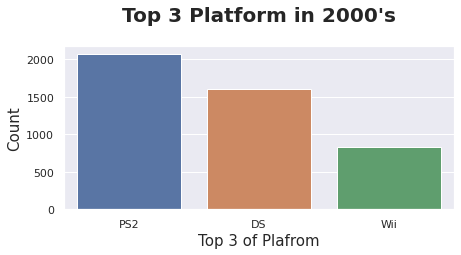

In [100]:
# 2000년대에 출시 된 게임의 플랫폼 상위 5개 시각화

platform_00 = df.groupby(['Year_group'])
platform_00 = platform_00.get_group(2000)

platform_00= platform_00.groupby('Platform')['Year_group'].count()
platform_00 = platform_00.nlargest(3).to_frame()
platform_00.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Platform', y='Year_group', data= platform_00).set_title("Top 3 Platform in 2000's", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Plafrom", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0, 0.5, 'Count')

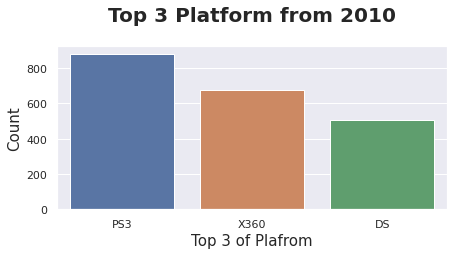

In [102]:
# 2010년대에 출시 된 게임의 플랫폼 상위 3개 시각화

platform_10 = df.groupby(['Year_group'])
platform_10 = platform_10.get_group(2010)

platform_10= platform_10.groupby('Platform')['Year_group'].count()
platform_10 = platform_10.nlargest(3).to_frame()
platform_10.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Platform', y='Year_group', data= platform_10).set_title("Top 3 Platform from 2010", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 3 of Plafrom", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

In [59]:
# 1980년대 출시 된 게임 중 장르가 액션인 게임의 플랫폼 별 수량

action80 = df[(df['Year_group'] == 1980) & (df['Genre'] == 'Action')]
action80['Platform'].value_counts()

2600    55
NES     10
DS       1
Name: Platform, dtype: int64

In [60]:
# 1990년대 출시 된 게임 중 장르가 액션인 게임의 플랫폼 별 수량

action90 = df[(df['Year_group'] == 1990) & (df['Genre'] == 'Action')]
action90['Platform'].value_counts()

PS      102
N64      25
SNES     12
PC        6
NES       3
GEN       3
GB        3
SAT       3
DC        1
Name: Platform, dtype: int64

In [61]:
# 2000년대 출시 된 게임 중 장르가 액션인 게임의 플랫폼 별 수량

action00 = df[(df['Year_group'] == 2000) & (df['Genre'] == 'Action')]
action00['Platform'].value_counts()

PS2     335
DS      233
GBA     161
XB      152
Wii     139
X360    129
PSP     112
GC       98
PS3      95
PC       55
PS       49
N64      10
GB        3
DC        2
Name: Platform, dtype: int64

In [62]:
# 2010년대 출시 된 게임 중 장르가 액션인 게임의 플랫폼 별 수량

action10 = df[(df['Year_group'] == 2010) & (df['Genre'] == 'Action')]
action10['Platform'].value_counts()

PS3     273
X360    189
3DS     179
PSV     139
PS4     121
PSP     104
PC       99
DS       99
Wii      89
XOne     68
WiiU     63
PS2       6
Name: Platform, dtype: int64

In [ ]:
df_a = pd.DataFrame({
    'Genre' : sample_array,
    'Platform' : sample_array*2,
    'col3' : ["A","B","C","D","E"]
})

print(sample_df)


df = pd.DataFrame([[,90,100,70],[70,80,90,100]],
                  index=['1980년대','1990년대','2000년대','2010년대'],
                 columns=['장르','플랫폼'])
df

# 2010년부터의 데이터만 출력

In [63]:
# 2010년부터의 데이터만 출력 (data = year_2010)

year_2010= df[(df['Year_group'] >= 2010)]

year_2010.reset_index(inplace=True, drop=True)
year_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Western_Sales,all_sales,Year_group,PS_total
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0,2010,플레이스테이션O
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0,2010,플레이스테이션X
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.21,0,2010,플레이스테이션O
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,0,2010,플레이스테이션X
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.07,0,2010,플레이스테이션O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.25,0,2010,플레이스테이션X
5082,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.15,0,2010,플레이스테이션O
5083,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.00,0,2010,플레이스테이션O
5084,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.63,0,2010,플레이스테이션O


In [64]:
# 2010년부터의 글로벌 출고량 컬럼 생성

year_2010['all_sales'] = year_2010['EU_Sales'] + year_2010['NA_Sales'] + year_2010['JP_Sales'] + year_2010['Other_Sales']
year_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Western_Sales,all_sales,Year_group,PS_total
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.00,0.02,2010,플레이스테이션O
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04,2010,플레이스테이션X
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.21,0.25,2010,플레이스테이션O
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,0.03,2010,플레이스테이션X
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.07,0.08,2010,플레이스테이션O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.25,0.27,2010,플레이스테이션X
5082,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.15,0.18,2010,플레이스테이션O
5083,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.00,0.05,2010,플레이스테이션O
5084,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.63,0.79,2010,플레이스테이션O


In [65]:
year2 = year_2010.sort_values(by=["all_sales"], ascending=[False])
year2.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Western_Sales,all_sales,Year_group,PS_total
1297,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,19.91,21.82,2010,플레이스테이션X
1043,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,16.28,21.39,2010,플레이스테이션O
3329,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,14.94,16.38,2010,플레이스테이션X
838,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,13.31,14.76,2010,플레이스테이션X
1885,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,13.40,14.64,2010,플레이스테이션X
2767,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,11.58,14.24,2010,플레이스테이션O
1264,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,10.87,14.04,2010,플레이스테이션O
1935,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,12.55,13.74,2010,플레이스테이션X
4322,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,11.36,13.47,2010,플레이스테이션O
3035,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,10.42,12.73,2010,플레이스테이션O


In [ ]:
genre_total = year_2010['Genre'].value_counts().to_frame()

In [161]:
# 2010년대 출시 된 장르별 게임수량 >  이것을 통해 shooter게임의 수량이 수요에 비해 많지 않음을 확인 가능.

genre2010 = year_2010['Genre'].value_counts().to_frame()

In [190]:
# 2010년대 출시 된 장르별 게임의 총 출고량

sales_2010 = year_2010.groupby('Genre')['all_sales'].sum().to_frame()
sales_2010.reset_index
sales_2010

,all_sales
Genre,
Action,669.49
Adventure,60.79
Fighting,81.13
Misc,228.60
Platform,120.73
Puzzle,20.95
Racing,123.49
Role-Playing,264.22
Shooter,456.40


In [200]:
# 2010년대 출시 된 장르별 게임수량과 총 출고량의 데이터프레임 결합

genre_sales_2010 = pd.concat([genre2010,sales_2010],axis=1)
genre_sales_2010

,Genre,all_sales
Action,1429,669.49
Sports,567,321.73
Misc,557,228.60
Role-Playing,549,264.22
Adventure,537,60.79
Shooter,390,456.40
Racing,231,123.49
Simulation,204,70.55
Fighting,194,81.13
Strategy,166,35.51


In [202]:
genre_sales_2010_2 = genre_sales_2010.copy()
genre_sales_2010_2

,Genre,all_sales
Action,1429,669.49
Sports,567,321.73
Misc,557,228.60
Role-Playing,549,264.22
Adventure,537,60.79
Shooter,390,456.40
Racing,231,123.49
Simulation,204,70.55
Fighting,194,81.13
Strategy,166,35.51


In [216]:
# 귀무가설 H0 : 장르와 플랫폼은 서로 연관관계에 있지 않다.

# 대립가설 H1 : 장르와 플랫폼은 서로 연관관계가 있다.

# 장르
xo = genre_sales_2010_2['Genre']

# 플랫폼
xe = genre_sales_2010_2['all_sales']
# df 
xc = genre_sales_2010_2



In [215]:
# p <0.05 이므로 귀무가설을 기각하고 대립가설을 채택한다. 

from scipy.stats import chi2_contingency

chi_2, p, dof, expected = chi2_contingency([xo, xe])
msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi_2, p, dof))


Test Statistic: 385.89621582391067
p-value: 6.018958308385363e-76
Degree of Freedom: 11


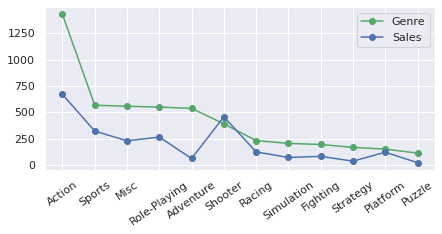

In [169]:
# 2010년대 출시 된 장르별 게임수량과 총 출고량의 데이터프레임 결합 > 시각화
# 그린포인트와 블루포인트의 간격이 좁을 수록 수요에 비해 공급이 적음을 의미

Genre = genre_sales_2010['Genre']
Sales = genre_sales_2010['all_sales']
x= genre_sales_2010.index
y1=Genre
y2=Sales
plt.plot(x, y1, color = 'g', linestyle = 'solid', marker = 'o', label = "Genre")
plt.plot(x, y2, color = 'b', linestyle = 'solid', marker = 'o', label = "Sales")
plt.xticks(rotation = 35)
plt.legend()
plt.show()

In [68]:
# 2010년 이후의 장르별 글로벌 출고량 시각화

genre_2010 = year_2010.groupby('Genre')['all_sales'].count()
genre_2010 = genre_2010.nlargest(5).to_frame()
genre_2010.reset_index(inplace=True)
genre_2010

,Genre,all_sales
0,Action,1429
1,Sports,567
2,Misc,557
3,Role-Playing,549
4,Adventure,537


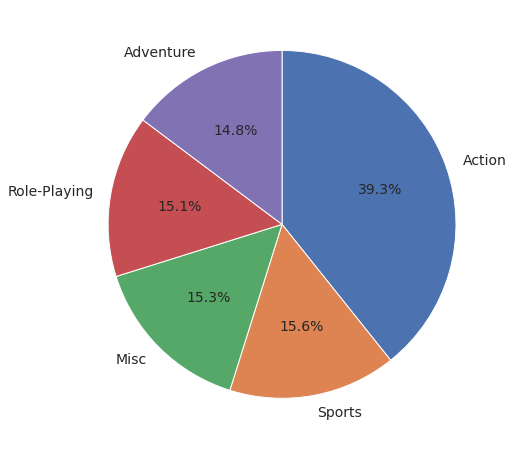

In [69]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
plt.pie(genre_2010['all_sales'], labels = genre_2010['Genre'], startangle=90, autopct='%1.1f%%', counterclock=False, textprops={'fontsize': 14})
  # text font size
plt.show()

In [165]:
# 2010년 부터의 플랫폼별 게임 수량 > 이것을 통해 PS계열 게임의 수량이 많음을 확인 가능

platform2010 = year_2010['Platform'].value_counts().to_frame()

In [166]:
# 2010년대 출시 된 플랫폼별 게임의 총 출고량

plat_sales_2010 = year_2010.groupby('Platform')['all_sales'].sum().to_frame()
plat_sales_2010.reset_index
plat_sales_2010

,all_sales
Platform,
3DS,231.22
DS,113.57
PC,119.35
PS2,5.57
PS3,600.10
PS4,269.15
PSP,62.03
PSV,60.85
Wii,223.08


In [168]:
# 2010년대 출시 된 장르별 게임수량과 총 출고량의 데이터프레임 결합

platform_sales_2010 = pd.concat([plat_sales_2010,platform2010],axis=1)
platform_sales_2010

,all_sales,Platform
3DS,231.22,494
DS,113.57,505
PC,119.35,454
PS2,5.57,43
PS3,600.10,879
PS4,269.15,332
PSP,62.03,495
PSV,60.85,404
Wii,223.08,448
WiiU,81.79,143


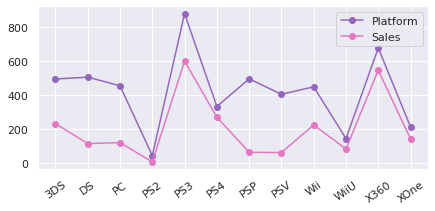

In [179]:
# 2010년대 출시 된 플랫폼별 게임수량과 총 출고량의 데이터프레임 결합 > 시각화
# 사람들이 많이 이용하는 플랫폼에 출시하는 것이 소비자 접근성이 좋음 > 블루 포인트가 높은 플랫폼은 PS

Platform = platform_sales_2010['Platform']
Sales = platform_sales_2010['all_sales']
x= platform_sales_2010.index
y1=Platform
y2=Sales
plt.plot(x, y1, color = '#9467bd', linestyle = 'solid', marker = 'o', label = "Platform")
plt.plot(x, y2, color = '#e377c2', linestyle = 'solid', marker = 'o', label = "Sales")
plt.xticks(rotation = 35)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

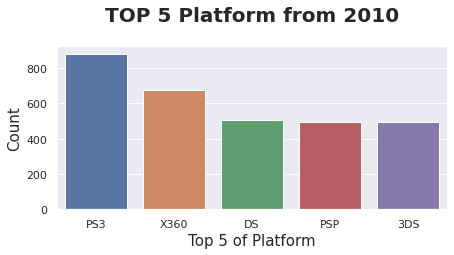

In [71]:
# 2010년 이후의 플랫폼별 글로벌 출고량 합계 시각화
# PS계열이 2,4위로 해당 플랫폼으로 이용하는 게임의 출고량이 많음이 확인됨.

platform_2010= year_2010.groupby('Platform')['all_sales'].count()
platform_2010 = platform_2010.nlargest(5).to_frame()
platform_2010.reset_index(inplace=True)


sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(7, 3)}) #width=8, height=4
sns.barplot(x='Platform', y='all_sales', data=platform_2010).set_title("TOP 5 Platform from 2010", fontsize=20,fontweight= 'bold', pad=25)
plt.xlabel("Top 5 of Platform", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

